# 1. Знакомство с данными

## Импорт библиотек, необходимых для работ

In [1]:

import numpy as np # линейная алгебра
import pandas as pd # для анализа и предобработки данных
import matplotlib
import matplotlib.pyplot as plt # для визуализации
import seaborn as sns # для визуализации
import plotly.express as px # для визуализации
from sklearn import linear_model # линейные модели
from sklearn import metrics # метрики
import statistics
from collections import Counter
from functools import reduce
import category_encoders as ce
%matplotlib inline
plt.style.use('seaborn-v0_8')


from functools import reduce

## Загрузка данных

In [3]:
nafld_1 = pd.read_csv('D:\курс по data science\IDE\diplom_project\data_2\processed_nafld_1.csv')
display(nafld_1.head())

,id,age,male,weight,height,bmi,status,bmi_category
0,1,57,0,60.0,163.0,22.7,0,healthy
1,2,67,0,70.4,168.0,24.9,0,healthy
2,3,53,1,105.8,186.0,30.5,0,obese (class I)
3,4,56,1,109.3,170.0,37.8,0,obese (class II)
4,5,68,1,83.9,169.0,29.4,1,pre-obesity


In [4]:
nafld_2 = pd.read_csv('D:\курс по data science\IDE\diplom_project\data_2\processed_nafld_2.csv')
display(nafld_2.head())

,id,MedianaHdl,result_hdl_mediana,MedianaChol,result_chol_mediana,MedianaSbp,result_sbp_mediana,MedianaDbp,result_dbp_mediana,result_fib4,result_smoke
0,1,74.0,ideal,74.0,ideal,NaN,NaN,NaN,NaN,NaN,NaN
1,2,77.5,ideal,77.5,ideal,NaN,NaN,NaN,NaN,NaN,NaN
2,3,52.0,normal,52.0,normal,135.0,high normal,135.0,hypertension,NaN,NaN
3,4,41.0,normal,41.0,normal,142.0,hypertension,142.0,hypertension,cirrosis,NaN
4,5,45.0,normal,45.0,normal,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
nafld_3 = pd.read_csv('D:\курс по data science\IDE\diplom_project\data_2\processed_nafld_3.csv')
display(nafld_3.head())

,id,event,nafld,dyslipidemia,ang/isc,diabetes,stroke,afib,heart failure,MI,cardiac arrest,htn
0,3,nafld,1,0,0,0,0,0,0,0,0,0
1,4,"htn, dyslipidemia, ang/isc, ang/isc",0,1,1,0,0,0,0,0,0,1
2,5,htn,0,0,0,0,0,0,0,0,0,1
3,7,dyslipidemia,0,1,0,0,0,0,0,0,0,0
4,9,"diabetes, nafld",1,0,0,1,0,0,0,0,0,0


## Объединение датафреймов в один датафрейм

In [7]:
display(nafld_1['id'].nunique())
display(nafld_2['id'].nunique())
display(nafld_2['id'].nunique())

17518

15666

15666

Отфильтровать 2 таблицы 'nafld_1' и 'nafld_2' по количеству 'id' из таблицы 'nafld_3', после чего выполнить объединение 3ех таблиц в одну

In [8]:
list_id = nafld_3['id'].tolist()
nafld_1_filtered = nafld_1.loc[nafld_1['id'].isin(list_id)]
nafld_1_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12423 entries, 2 to 17517
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            12423 non-null  int64  
 1   age           12423 non-null  int64  
 2   male          12423 non-null  int64  
 3   weight        12423 non-null  float64
 4   height        12423 non-null  float64
 5   bmi           12423 non-null  float64
 6   status        12423 non-null  int64  
 7   bmi_category  12423 non-null  object 
dtypes: float64(3), int64(4), object(1)
memory usage: 873.5+ KB


In [9]:
nafld_2_filtered = nafld_2.loc[nafld_2['id'].isin(list_id)]
nafld_2_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15576 entries, 2 to 19456
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15576 non-null  int64  
 1   MedianaHdl           15386 non-null  float64
 2   result_hdl_mediana   15386 non-null  object 
 3   MedianaChol          15386 non-null  float64
 4   result_chol_mediana  15386 non-null  object 
 5   MedianaSbp           9049 non-null   float64
 6   result_sbp_mediana   9049 non-null   object 
 7   MedianaDbp           9049 non-null   float64
 8   result_dbp_mediana   9049 non-null   object 
 9   result_fib4          4903 non-null   object 
 10  result_smoke         5934 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 1.4+ MB


In [13]:
join_nafld_1_3 = nafld_1_filtered.merge(nafld_3, on = 'id', how = 'outer')
join_nafld_1_3.head(3)

,id,age,male,weight,height,bmi,status,bmi_category,event,nafld,dyslipidemia,ang/isc,diabetes,stroke,afib,heart failure,MI,cardiac arrest,htn
0,3,53.0,1.0,105.8,186.0,30.5,0.0,obese (class I),nafld,1,0,0,0,0,0,0,0,0,0
1,4,56.0,1.0,109.3,170.0,37.8,0.0,obese (class II),"htn, dyslipidemia, ang/isc, ang/isc",0,1,1,0,0,0,0,0,0,1
2,5,68.0,1.0,83.9,169.0,29.4,1.0,pre-obesity,htn,0,0,0,0,0,0,0,0,0,1


In [12]:
join_nafld = join_nafld_1_3.merge(nafld_2_filtered, on = 'id', how = 'outer')
join_nafld.head(3)


,id,age,male,weight,height,bmi,status,bmi_category,event,nafld,...,MedianaHdl,result_hdl_mediana,MedianaChol,result_chol_mediana,MedianaSbp,result_sbp_mediana,MedianaDbp,result_dbp_mediana,result_fib4,result_smoke
0,3,53.0,1.0,105.8,186.0,30.5,0.0,obese (class I),nafld,1,...,52.0,normal,52.0,normal,135.0,high normal,135.0,hypertension,NaN,NaN
1,4,56.0,1.0,109.3,170.0,37.8,0.0,obese (class II),"htn, dyslipidemia, ang/isc, ang/isc",0,...,41.0,normal,41.0,normal,142.0,hypertension,142.0,hypertension,cirrosis,NaN
2,5,68.0,1.0,83.9,169.0,29.4,1.0,pre-obesity,htn,0,...,45.0,normal,45.0,normal,NaN,NaN,NaN,NaN,NaN,NaN


## Предобработка данных

Выявить наличие пропусков, дубликатов в объединенной таблице

In [14]:
join_nafld.isnull().mean().round(2).sort_values(ascending=False)

result_fib4            0.69
result_smoke           0.63
result_dbp_mediana     0.43
MedianaDbp             0.43
result_sbp_mediana     0.43
MedianaSbp             0.43
result_chol_mediana    0.03
MedianaChol            0.03
result_hdl_mediana     0.03
MedianaHdl             0.03
heart failure          0.00
htn                    0.00
cardiac arrest         0.00
MI                     0.00
id                     0.00
age                    0.00
stroke                 0.00
diabetes               0.00
ang/isc                0.00
dyslipidemia           0.00
nafld                  0.00
event                  0.00
bmi_category           0.00
status                 0.00
bmi                    0.00
height                 0.00
weight                 0.00
male                   0.00
afib                   0.00
dtype: float64

более 30% пропусков рекомендовано удалять столбцы полностью

In [15]:
join_nafld = join_nafld.dropna(subset=['age', 'male', 'weight', 'height','bmi', 'status', 'bmi_category'])
join_nafld = join_nafld.drop(['result_fib4', 'result_smoke', 'result_dbp_mediana', 'result_sbp_mediana', 'MedianaDbp', 'MedianaSbp'], axis=1)
join_nafld

,id,age,male,weight,height,bmi,status,bmi_category,event,nafld,...,stroke,afib,heart failure,MI,cardiac arrest,htn,MedianaHdl,result_hdl_mediana,MedianaChol,result_chol_mediana
0,3,53.0,1.0,105.8,186.0,30.5,0.0,obese (class I),nafld,1,...,0,0,0,0,0,0,52.0,normal,52.0,normal
1,4,56.0,1.0,109.3,170.0,37.8,0.0,obese (class II),"htn, dyslipidemia, ang/isc, ang/isc",0,...,0,0,0,0,0,1,41.0,normal,41.0,normal
2,5,68.0,1.0,83.9,169.0,29.4,1.0,pre-obesity,htn,0,...,0,0,0,0,0,1,45.0,normal,45.0,normal
3,7,49.0,0.0,66.2,161.0,25.5,0.0,pre-obesity,dyslipidemia,0,...,0,0,0,0,0,0,72.0,ideal,72.0,ideal
4,9,47.0,1.0,110.8,188.0,31.4,0.0,obese (class I),"diabetes, nafld",1,...,0,0,0,0,0,0,38.0,low,38.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15762,17562,46.0,0.0,53.0,161.0,20.5,0.0,healthy,MI,0,...,0,0,0,1,0,0,60.0,ideal,60.0,ideal
15763,17563,52.0,1.0,111.8,154.0,47.3,0.0,obese (class III),"dyslipidemia, ang/isc, htn, nafld, diabetes",1,...,0,0,0,0,0,1,35.0,low,35.0,low
15764,17563,52.0,1.0,111.8,154.0,47.3,0.0,obese (class III),"dyslipidemia, ang/isc, htn, nafld, diabetes",1,...,0,0,0,0,0,1,35.0,low,35.0,low
15765,17564,59.0,0.0,57.3,169.0,20.1,0.0,healthy,dyslipidemia,0,...,0,0,0,0,0,0,53.0,normal,53.0,normal


Проверим датафрейм на дубликаты 

In [16]:
print(join_nafld.shape[0])
dupl_columns = list(join_nafld.columns)
mask = join_nafld.duplicated(subset=dupl_columns)
join_nafld_duplicates = join_nafld[mask]
print(f'Число найденных дубликатов: {join_nafld_duplicates.shape[0]}')
join_nafld_dedupped = join_nafld.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {join_nafld_dedupped.shape[0]}')

15767
Число найденных дубликатов: 3344
Результирующее число записей: 12423


Выполненим удаление дубликатов из датафрейма

In [17]:
join_nafld = join_nafld.drop_duplicates()
join_nafld = pd.DataFrame(join_nafld)
join_nafld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12423 entries, 0 to 15766
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   12423 non-null  int64  
 1   age                  12423 non-null  float64
 2   male                 12423 non-null  float64
 3   weight               12423 non-null  float64
 4   height               12423 non-null  float64
 5   bmi                  12423 non-null  float64
 6   status               12423 non-null  float64
 7   bmi_category         12423 non-null  object 
 8   event                12423 non-null  object 
 9   nafld                12423 non-null  int64  
 10  dyslipidemia         12423 non-null  int64  
 11  ang/isc              12423 non-null  int64  
 12  diabetes             12423 non-null  int64  
 13  stroke               12423 non-null  int64  
 14  afib                 12423 non-null  int64  
 15  heart failure        12423 non-null 

Изучим наличие пропусков в объединенной таблице

In [18]:
join_nafld.isnull().mean().round(3).sort_values(ascending=False)

result_chol_mediana    0.029
MedianaChol            0.029
result_hdl_mediana     0.029
MedianaHdl             0.029
diabetes               0.000
htn                    0.000
cardiac arrest         0.000
MI                     0.000
heart failure          0.000
afib                   0.000
stroke                 0.000
id                     0.000
age                    0.000
dyslipidemia           0.000
nafld                  0.000
event                  0.000
bmi_category           0.000
status                 0.000
bmi                    0.000
height                 0.000
weight                 0.000
male                   0.000
ang/isc                0.000
dtype: float64

Имеются пропуски в 4ех столбцах меньше 3% от всех данных, можно удалить строки (362 строки), в которых есть пропуски или же заменить медианой   
Заменим медианой

In [23]:
join_nafld['MedianaChol'] = join_nafld['MedianaChol'].fillna(join_nafld['MedianaChol'].median())
join_nafld['MedianaHdl'] = join_nafld['MedianaHdl'].fillna(join_nafld['MedianaHdl'].median())

def get_hdl(value):
    return 'low' if value < 40.0 else ('normal' if 40.0 <= value <= 59.0 else 'ideal')

def get_chol(value):
    return 'low' if value < 40.0 else ('normal' if 40.0 <= value <= 59.0 else 'ideal')

join_nafld.loc[:, 'result_hdl_mediana'] = join_nafld['MedianaHdl'].apply(get_hdl)
join_nafld.loc[:, 'result_chol_mediana'] = join_nafld['MedianaChol'].apply(get_chol)

join_nafld.isnull().sum()

id                                 0
age                                0
male                               0
weight                             0
height                             0
bmi                                0
status                             0
bmi_category                       0
event                              0
nafld                              0
dyslipidemia                       0
ang/isc                            0
diabetes                           0
stroke                             0
afib                               0
heart failure                      0
MI                                 0
cardiac arrest                     0
htn                                0
MedianaHdl                         0
result_hdl_mediana                 0
MedianaChol                        0
result_chol_mediana                0
bmi_category_obese (class I)       0
bmi_category_obese (class II)      0
bmi_category_pre-obesity           0
bmi_category_healthy               0
b

In [24]:
join_nafld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12423 entries, 0 to 15766
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               12423 non-null  int64  
 1   age                              12423 non-null  float64
 2   male                             12423 non-null  float64
 3   weight                           12423 non-null  float64
 4   height                           12423 non-null  float64
 5   bmi                              12423 non-null  float64
 6   status                           12423 non-null  float64
 7   bmi_category                     12423 non-null  object 
 8   event                            12423 non-null  object 
 9   nafld                            12423 non-null  int64  
 10  dyslipidemia                     12423 non-null  int64  
 11  ang/isc                          12423 non-null  int64  
 12  diabetes          

## Кодирование категориальных признаков

В объединенном датафрейме имеются 4 столбца в формате object, для того чтобы можно было выполнить машинное обучение будет выполнить кодирование признаков.


In [20]:
columns_to_encoder = ['bmi_category','result_chol_mediana', 'result_hdl_mediana']
encoder = ce.OneHotEncoder(cols=columns_to_encoder, use_cat_names=True) # указываем столбцы для кодирования
type_bin = encoder.fit_transform(join_nafld[columns_to_encoder])
join_nafld = pd.concat([join_nafld, type_bin], axis=1)

join_nafld.head(3)

,id,age,male,weight,height,bmi,status,bmi_category,event,nafld,...,bmi_category_underweight,bmi_category_severe underweight,result_chol_mediana_normal,result_chol_mediana_ideal,result_chol_mediana_low,result_chol_mediana_nan,result_hdl_mediana_normal,result_hdl_mediana_ideal,result_hdl_mediana_low,result_hdl_mediana_nan
0,3,53.0,1.0,105.8,186.0,30.5,0.0,obese (class I),nafld,1,...,0,0,1,0,0,0,1,0,0,0
1,4,56.0,1.0,109.3,170.0,37.8,0.0,obese (class II),"htn, dyslipidemia, ang/isc, ang/isc",0,...,0,0,1,0,0,0,1,0,0,0
2,5,68.0,1.0,83.9,169.0,29.4,1.0,pre-obesity,htn,0,...,0,0,1,0,0,0,1,0,0,0


In [25]:
join_nafld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12423 entries, 0 to 15766
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               12423 non-null  int64  
 1   age                              12423 non-null  float64
 2   male                             12423 non-null  float64
 3   weight                           12423 non-null  float64
 4   height                           12423 non-null  float64
 5   bmi                              12423 non-null  float64
 6   status                           12423 non-null  float64
 7   bmi_category                     12423 non-null  object 
 8   event                            12423 non-null  object 
 9   nafld                            12423 non-null  int64  
 10  dyslipidemia                     12423 non-null  int64  
 11  ang/isc                          12423 non-null  int64  
 12  diabetes          

#### В итоге у нас получился датафрейм с 38 столбцами по результатам анализов 12423 пациентов.

In [21]:
columns_name = join_nafld.columns
column_names_list = columns_name.tolist()
column_names_list

['id',
 'age',
 'male',
 'weight',
 'height',
 'bmi',
 'status',
 'bmi_category',
 'event',
 'nafld',
 'dyslipidemia',
 'ang/isc',
 'diabetes',
 'stroke',
 'afib',
 'heart failure',
 'MI',
 'cardiac arrest',
 'htn',
 'MedianaHdl',
 'result_hdl_mediana',
 'MedianaChol',
 'result_chol_mediana',
 'bmi_category_obese (class I)',
 'bmi_category_obese (class II)',
 'bmi_category_pre-obesity',
 'bmi_category_healthy',
 'bmi_category_obese (class III)',
 'bmi_category_underweight',
 'bmi_category_severe underweight',
 'result_chol_mediana_normal',
 'result_chol_mediana_ideal',
 'result_chol_mediana_low',
 'result_chol_mediana_nan',
 'result_hdl_mediana_normal',
 'result_hdl_mediana_ideal',
 'result_hdl_mediana_low',
 'result_hdl_mediana_nan']

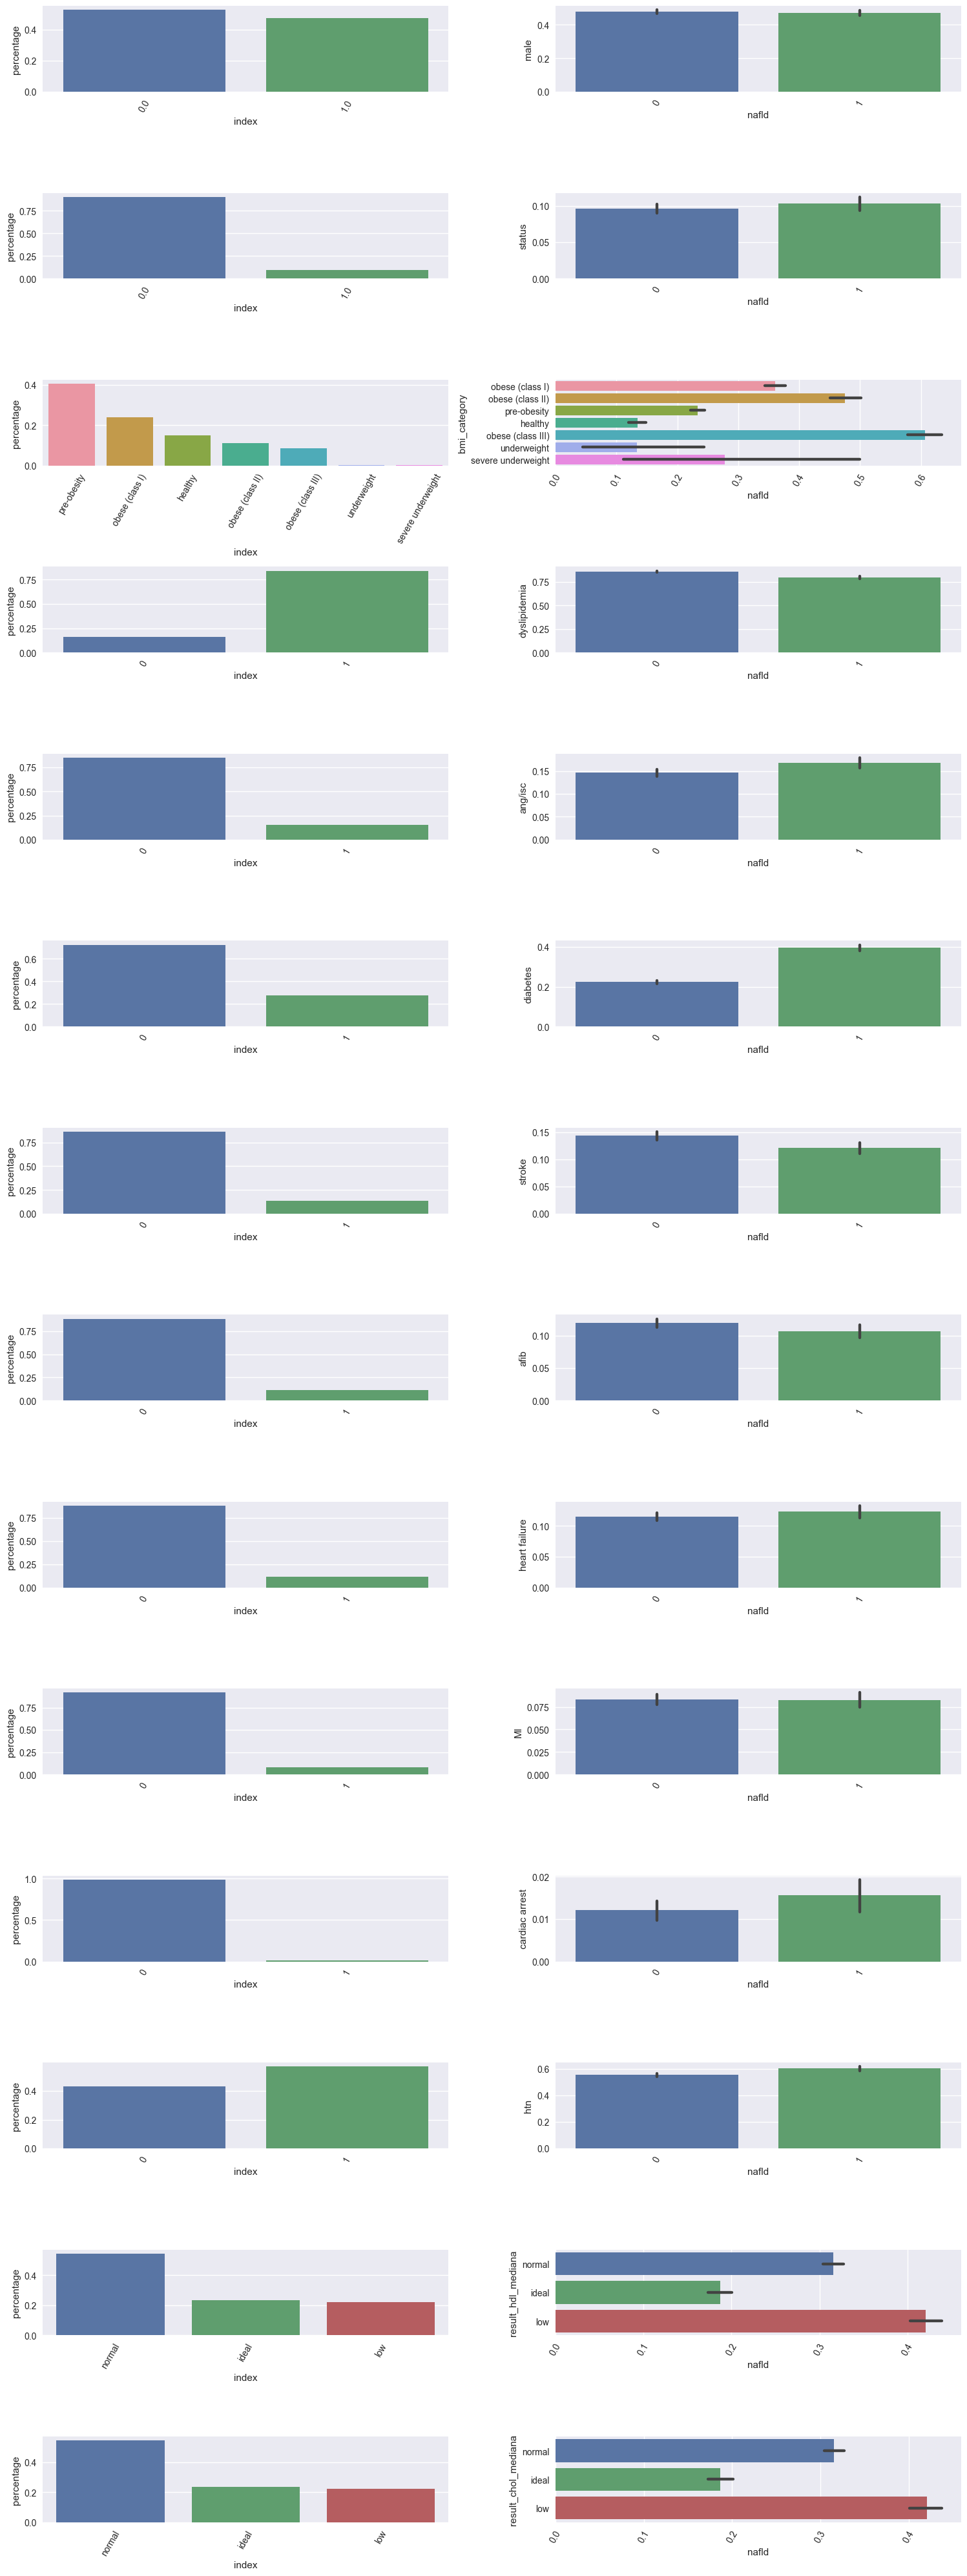

In [26]:
cat_features = ['male', 'status', 'bmi_category', 'dyslipidemia','ang/isc','diabetes','stroke',
                'afib','heart failure','MI','cardiac arrest','htn','result_hdl_mediana', 'result_chol_mediana' ]
n = len(cat_features) #число категориальных признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 40)) #фигура+n*2 координатных плоскостей
#Создаём цикл для всех признаков из списка категориальных признаков
for i, feature in enumerate(cat_features):
    #Строим количественную столбчатую диаграмму для долевого соотношения каждой из категорий в данных
    count_data = (join_nafld[feature].value_counts(normalize=True)
                  .sort_values(ascending=False)
                  .rename('percentage')
                  .reset_index())
    count_barplot = sns.barplot(data=count_data, x='index', y='percentage', ax=axes[i][0])
    count_barplot.xaxis.set_tick_params(rotation=60)
    #Строим столбчатую диаграмму доли людей зарабатывающих > 50K (среднее по столбцу income) в зависимости от категории
    mean_barplot = sns.barplot(data=join_nafld, x='nafld', y=feature, ax=axes[i][1])
    mean_barplot.xaxis.set_tick_params(rotation=60)
plt.tight_layout() #выравнивание графиков

In [27]:
# Составим список категориальных признаков:
cat_features = ['male', 'status','bmi_category', 'nafld','dyslipidemia','ang/isc','diabetes',
                'stroke','afib','heart failure','MI','cardiac arrest','htn','result_hdl_mediana',
                'result_chol_mediana']
 
# Составим список числовых признаков:
num_features = ['age', 'weight','height','bmi','MedianaHdl', 'MedianaChol', 'nafld']

## Оценка мультиколлинеарности и взаимосвязи с целевым признаком

Построим тепловую диаграмму для категориальных признаков

C:\Users\Елена\AppData\Local\Temp\ipykernel_2536\289520468.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(join_nafld[cat_features].corr(), annot = True);


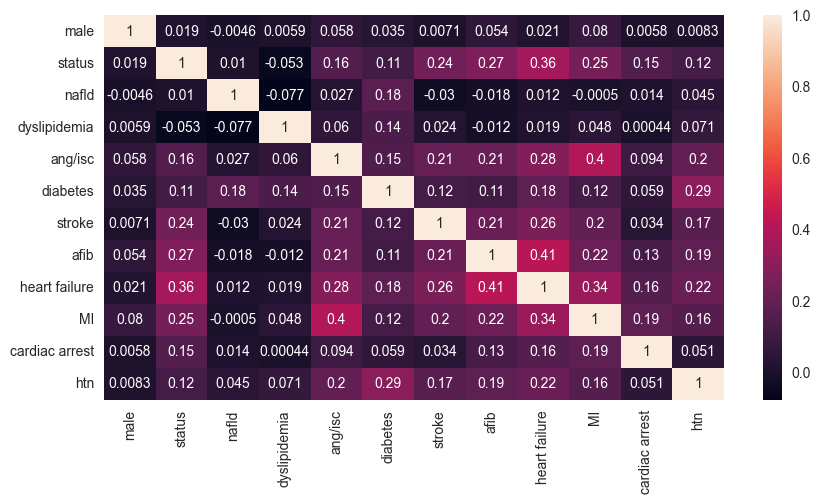

In [28]:

plt.figure(figsize = (10, 5))
sns.heatmap(join_nafld[cat_features].corr(), annot = True);

*Выяснилось, что НАЖБП сильно коррелировано именно с диабетом, а не с сердечно-сосудистыми заболеваниями*

Построим тепловую диаграмму для числовых признаков

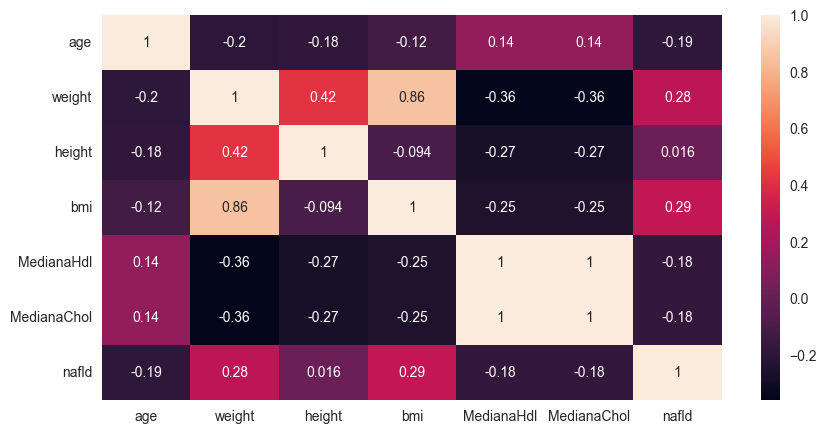

In [30]:
plt.figure(figsize = (10, 5))
sns.heatmap(join_nafld[num_features].corr(), annot = True);

Наблюдается корреляция НАЖБП с ИМТ и весом пациентов

Ранг матрицы корреляций: 6
Определитель матрицы корреляций: 0.0000000


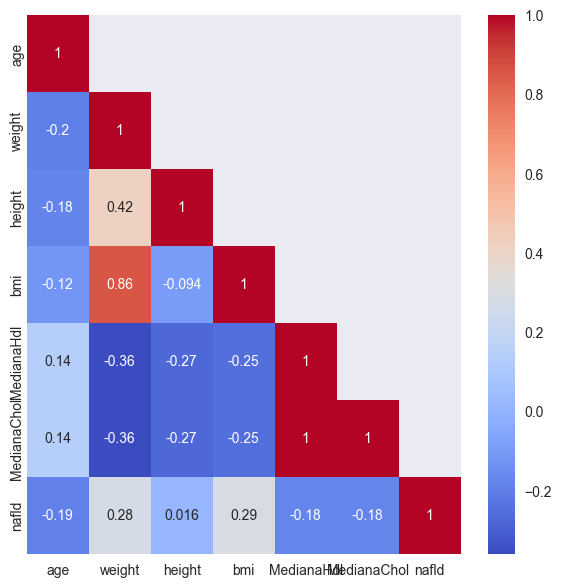

In [31]:
# Проверяем на мультиколлинеарность и корреляцию числовых признаков между собой и с главным признаком "nafld":
# строим матрицу корреляций
corr_matrix = np.corrcoef(join_nafld[num_features], rowvar=False)
print('Ранг матрицы корреляций:', np.linalg.matrix_rank(corr_matrix))
print('Определитель матрицы корреляций: {:.7f}'.format(np.linalg.det(corr_matrix)))

# формируем нижний треугольник матрицы корреляций
corr_matrix_tril = np.tril(corr_matrix)
# заполняем верхний треугольник значениями NaN
corr_matrix_tril[corr_matrix_tril == 0] = np.nan

# создаем фигуру с автоматическим масштабированием
plt.figure(figsize=(len(join_nafld[num_features].columns), len(join_nafld[num_features].columns)))

# строим тепловую карту
sns.heatmap(corr_matrix_tril, annot=True, cmap='coolwarm', mask=np.isnan(corr_matrix_tril))
# добавляем подписи столбцов на тепловой карте
plt.xticks(np.arange(len(join_nafld[num_features].columns))+0.5, join_nafld[num_features].columns, rotation=0, ha='center', fontsize=10)
plt.yticks(np.arange(len(join_nafld[num_features].columns))+0.5, join_nafld[num_features].columns, ha='center', fontsize=10, va='center', rotation=90)
# отображаем график
plt.show()

Присутствует мультиколлинеарность

In [33]:
# Составим список числовых признаков (исключили значения роста и веса, так эти покаазатели используются в расчете ИМТ)
num_features1 = ['age', 'bmi','MedianaHdl', 'nafld']

Ранг матрицы корреляций: 4
Определитель матрицы корреляций: 0.8040324


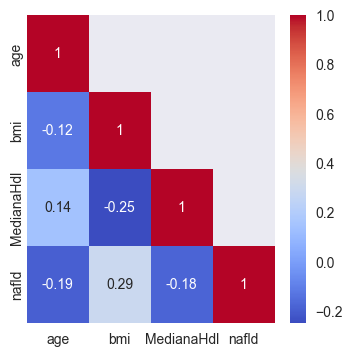

In [34]:
# Проверяем на мультиколлинеарность и корреляцию числовых признаков между собой и с главным признаком "target":
# строим матрицу корреляций
corr_matrix = np.corrcoef(join_nafld[num_features1], rowvar=False)
print('Ранг матрицы корреляций:', np.linalg.matrix_rank(corr_matrix))
print('Определитель матрицы корреляций: {:.7f}'.format(np.linalg.det(corr_matrix)))

# формируем нижний треугольник матрицы корреляций
corr_matrix_tril = np.tril(corr_matrix)
# заполняем верхний треугольник значениями NaN
corr_matrix_tril[corr_matrix_tril == 0] = np.nan

# создаем фигуру с автоматическим масштабированием
plt.figure(figsize=(len(join_nafld[num_features1].columns), len(join_nafld[num_features1].columns)))

# строим тепловую карту
sns.heatmap(corr_matrix_tril, annot=True, cmap='coolwarm', mask=np.isnan(corr_matrix_tril))
# добавляем подписи столбцов на тепловой карте
plt.xticks(np.arange(len(join_nafld[num_features1].columns))+0.5, join_nafld[num_features1].columns, rotation=0, ha='center', fontsize=10)
plt.yticks(np.arange(len(join_nafld[num_features1].columns))+0.5, join_nafld[num_features1].columns, ha='center', fontsize=10, va='center', rotation=90)
# отображаем график
plt.show()

Необходимо будет удалить следующие столбцы:

In [36]:
join_nafld_drop = join_nafld.drop(['weight','height','MedianaHdl','result_hdl_mediana', 'result_chol_mediana',
                              'result_hdl_mediana_normal','result_hdl_mediana_ideal','result_hdl_mediana_low',
                              'bmi_category', 'event'], axis=1)
join_nafld_drop.head(3)

,id,age,male,bmi,status,nafld,dyslipidemia,ang/isc,diabetes,stroke,...,bmi_category_pre-obesity,bmi_category_healthy,bmi_category_obese (class III),bmi_category_underweight,bmi_category_severe underweight,result_chol_mediana_normal,result_chol_mediana_ideal,result_chol_mediana_low,result_chol_mediana_nan,result_hdl_mediana_nan
0,3,53.0,1.0,30.5,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,4,56.0,1.0,37.8,0.0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,5,68.0,1.0,29.4,1.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


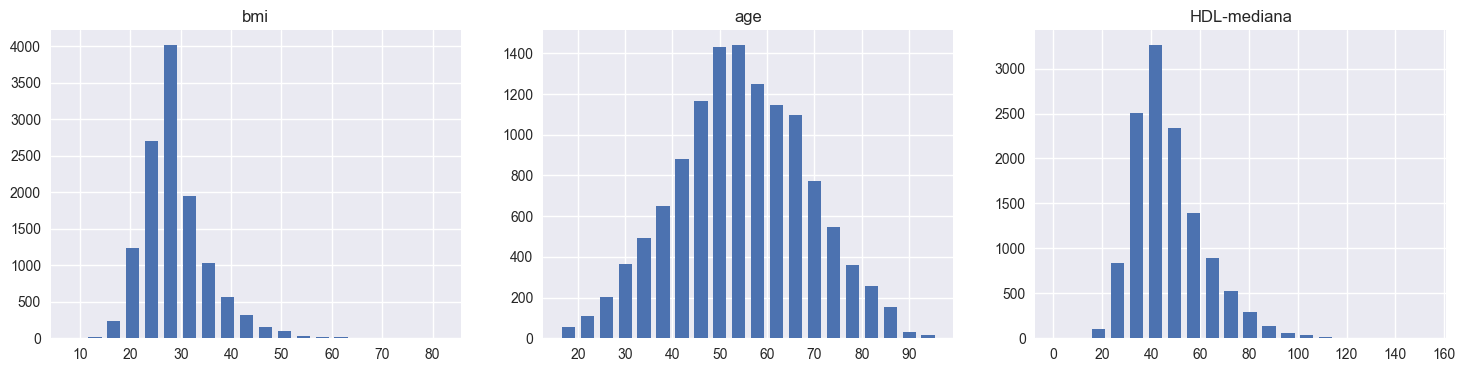

In [38]:
# функция для визуализации распределения числовых признаков

def visualize_distributions(titles_values_dict):
  columns = min(3, len(titles_values_dict))
  rows = (len(titles_values_dict) - 1) // columns + 1
  fig = plt.figure(figsize = (columns * 6, rows * 4))
  for i, (title, values) in enumerate(titles_values_dict.items()):
    hist, bins = np.histogram(values, bins = 20)
    ax = fig.add_subplot(rows, columns, i + 1)
    ax.bar(bins[:-1], hist, width = (bins[1] - bins[0]) * 0.7)
    ax.set_title(title)
  plt.show()
  

visualize_distributions({
    'bmi': join_nafld['bmi'],
    'age': join_nafld['age'],
    'HDL-mediana': join_nafld['MedianaHdl'],
})

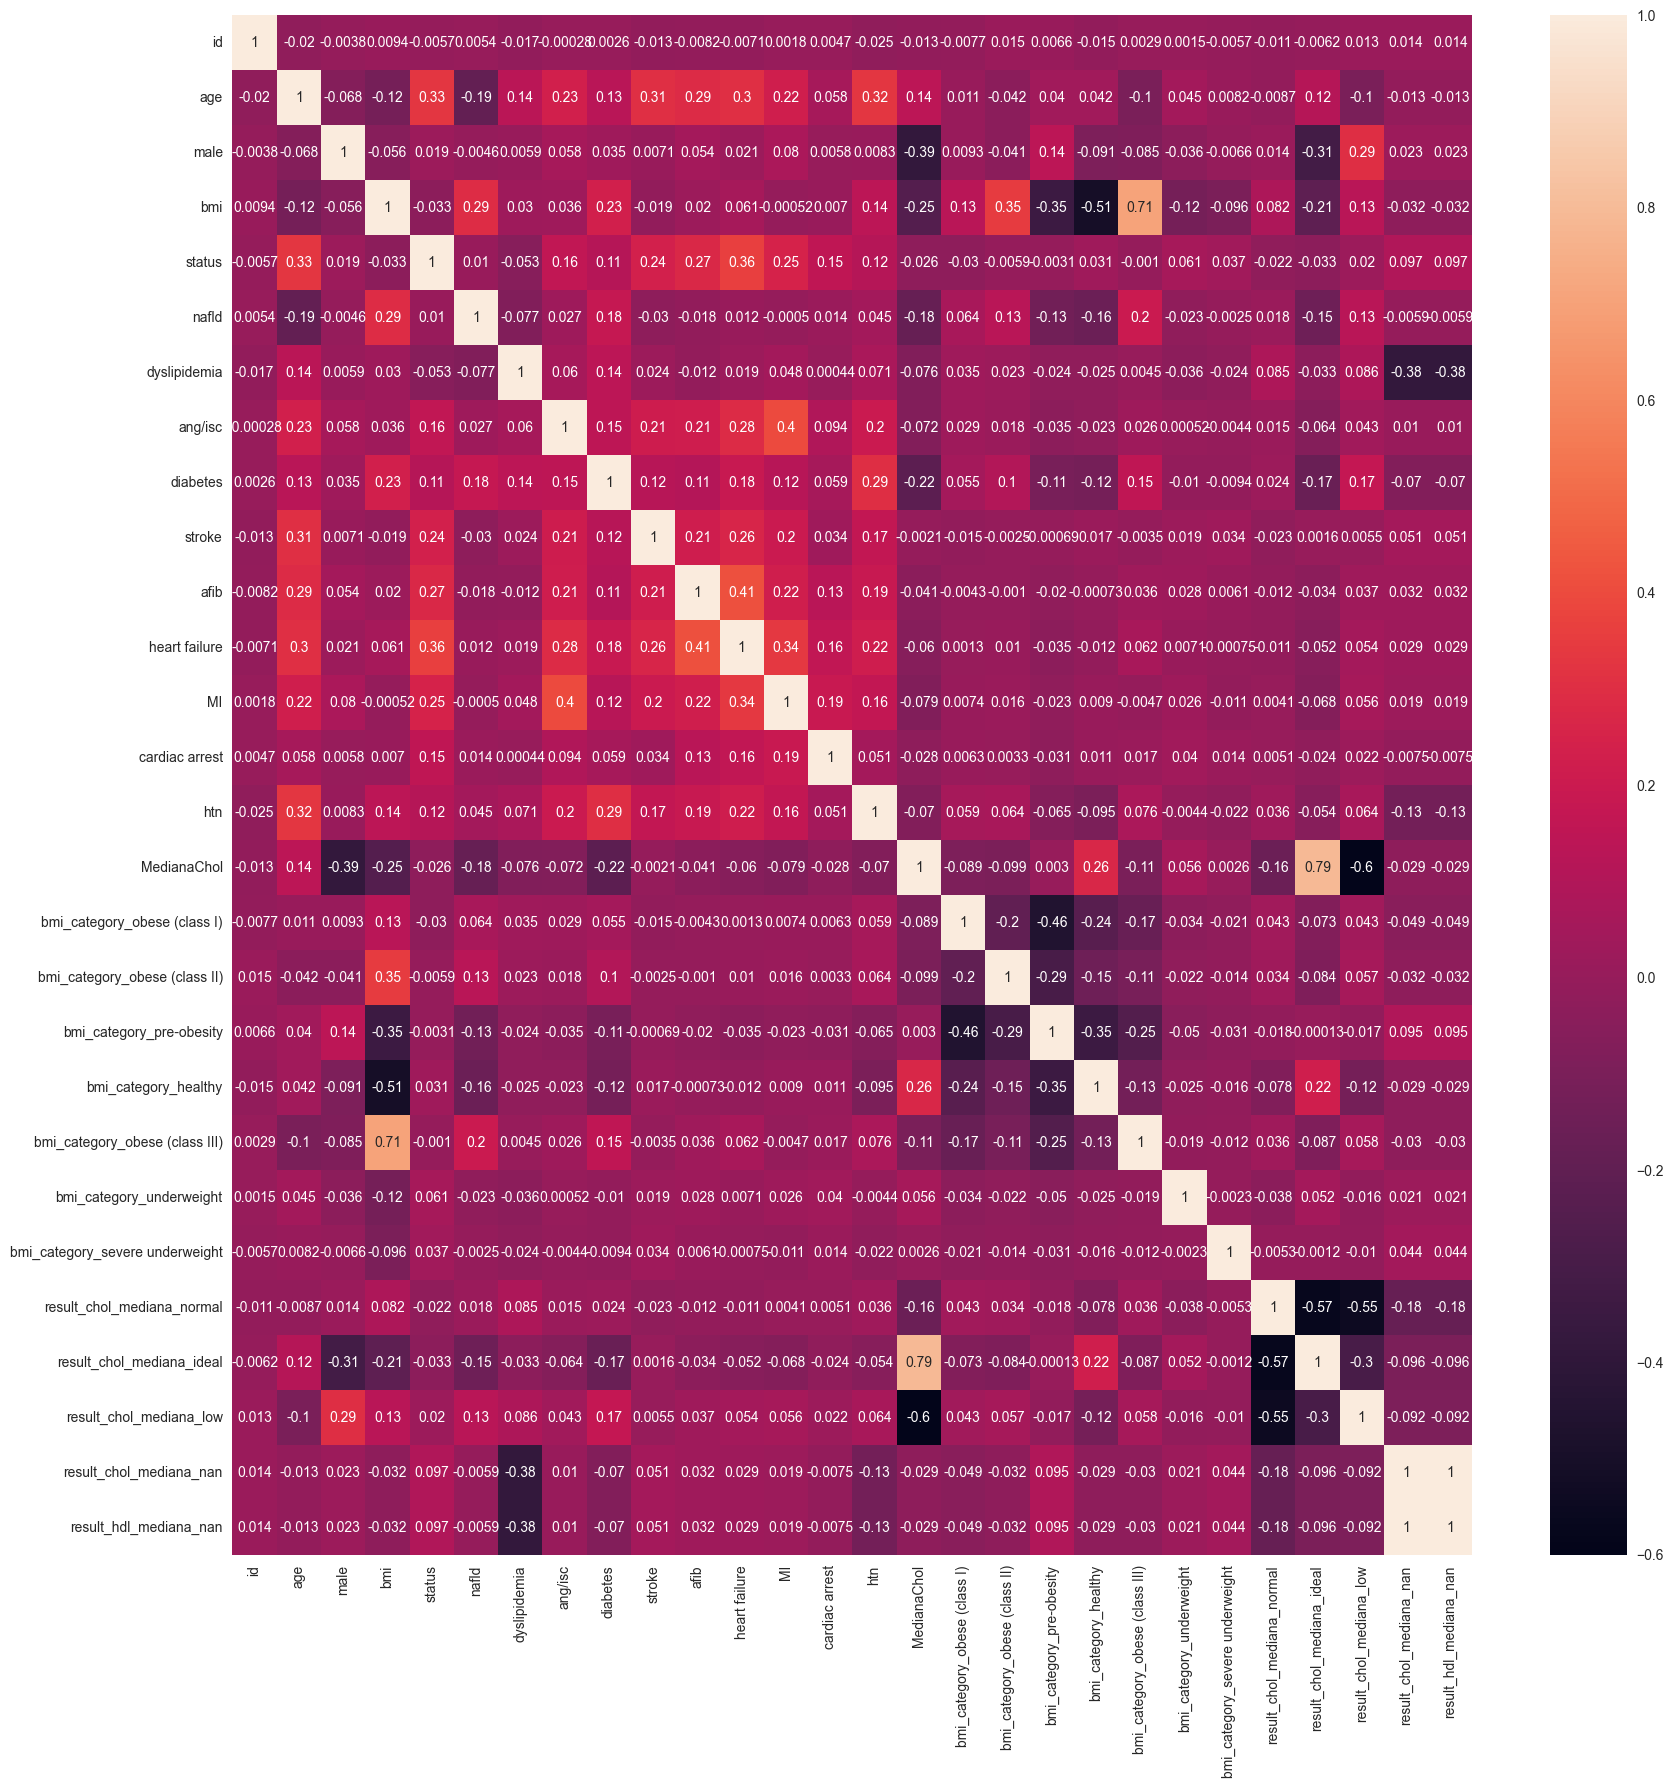

In [39]:
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(join_nafld_drop.corr(), annot=True);

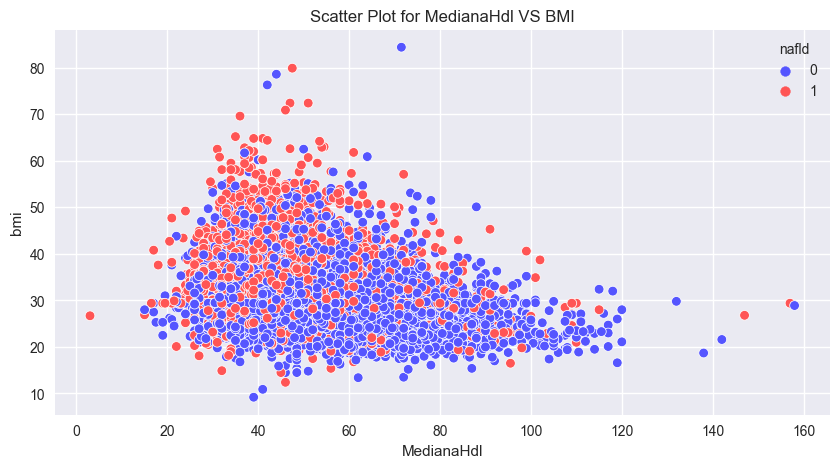

In [42]:
fig, ax = plt.subplots(figsize = (10, 5)) #фигура + координатная плоскость
#Строим диаграмму рассеяния
sns.scatterplot(
    data=join_nafld, #датасет
    x='MedianaHdl', #ось абсцисс
    y='bmi', #ось ординат
    hue='nafld', #группировка
    palette='seismic', #палитра
    ax=ax, #координатная плоскость
);
#Задаём название графика
ax.set_title('Scatter Plot for MedianaHdl VS BMI');

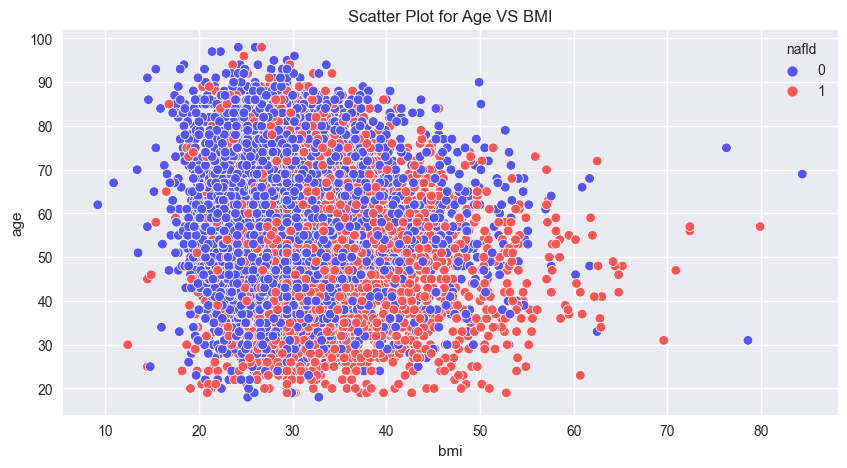

In [40]:
fig, ax = plt.subplots(figsize = (10, 5)) #фигура + координатная плоскость
#Строим диаграмму рассеяния
sns.scatterplot(
    data=join_nafld, #датасет
    x='bmi', #ось абсцисс
    y='age', #ось ординат
    hue='nafld', #группировка
    palette='seismic', #палитра
    ax=ax, #координатная плоскость
);
#Задаём название графика
ax.set_title('Scatter Plot for Age VS BMI');

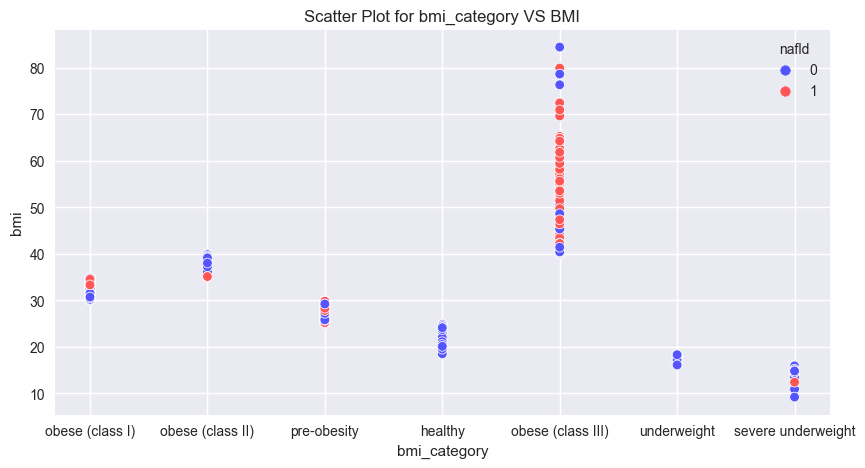

In [43]:
fig, ax = plt.subplots(figsize = (10, 5)) #фигура + координатная плоскость
#Строим диаграмму рассеяния
sns.scatterplot(
    data=join_nafld, #датасет
    x='bmi_category', #ось абсцисс
    y='bmi', #ось ординат
    hue='nafld', #группировка
    palette='seismic', #палитра
    ax=ax, #координатная плоскость
);
#Задаём название графика
ax.set_title('Scatter Plot for bmi_category VS BMI');

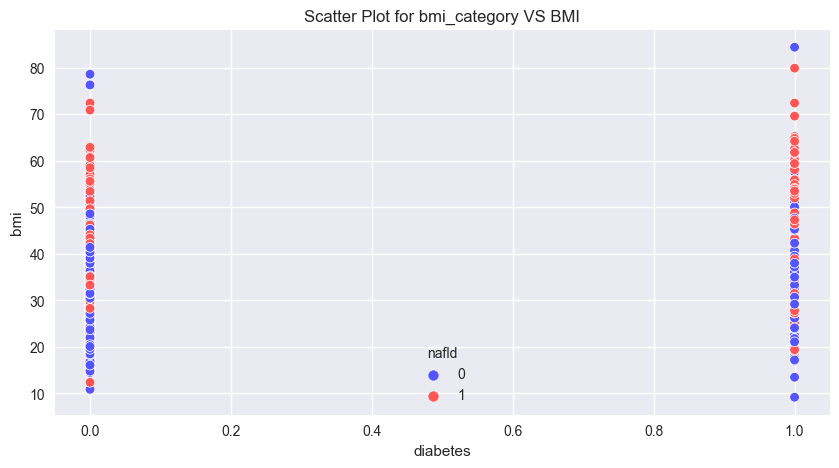

In [46]:
fig, ax = plt.subplots(figsize = (10, 5)) #фигура + координатная плоскость
#Строим диаграмму рассеяния
sns.scatterplot(
    data=join_nafld, #датасет
    x='diabetes', #ось абсцисс
    y='bmi', #ось ординат
    hue='nafld', #группировка
    palette='seismic', #палитра
    ax=ax, #координатная плоскость
);
#Задаём название графика
ax.set_title('Scatter Plot for bmi_category VS BMI');

На всех диаграммах рассеяния мы наблюдаем одно и тоже, что с увеличением ИМТ растет риск развития НАЖБП.

Сохранить преобразованные датафреймы

In [47]:
join_nafld_drop.to_csv('D:\курс по data science\IDE\diplom_project\data_2\\nafld_after_eda.csv', index=False)